In [60]:
import deepchem as dc
from deepchem.feat.graph_data import GraphData
from deepchem.feat import MolGraphConvFeaturizer
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./AqsolDB.csv')

In [3]:
df

,Unnamed: 0,Drug_ID,Drug,Y
0,0,"N,N,N-trimethyloctadecan-1-aminium bromide",CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],-3.616127
1,1,Benzo[cd]indol-2(1H)-one,O=C1Nc2cccc3cccc1c23,-3.254767
2,2,4-chlorobenzaldehyde,O=Cc1ccc(Cl)cc1,-2.177078
3,3,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...,-3.924409
4,4,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065
...,...,...,...,...
9977,9977,tetracaine,CCCCNc1ccc(C(=O)OCCN(C)C)cc1,-3.010000
9978,9978,tetracycline,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,-2.930000
9979,9979,thymol,Cc1ccc(C(C)C)c(O)c1,-2.190000
9980,9980,verapamil,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,-3.980000


In [4]:
# 1. SMILES에서 그래프 형식으로 변환
featurizer = MolGraphConvFeaturizer()
features = featurizer.featurize(df["Drug"])  # Smiles 컬럼에서 특징 추출

Failed to featurize datapoint 38, [Mo]. Appending empty array
Exception message: More than one atom should be present in the molecule for this featurizer to work.
Failed to featurize datapoint 143, [Mg+2]. Appending empty array
Exception message: More than one atom should be present in the molecule for this featurizer to work.
Failed to featurize datapoint 199, [Cd+2]. Appending empty array
Exception message: More than one atom should be present in the molecule for this featurizer to work.
Failed to featurize datapoint 296, [Re]. Appending empty array
Exception message: More than one atom should be present in the molecule for this featurizer to work.
[15:57:04] WARNING: not removing hydrogen atom without neighbors
Failed to featurize datapoint 419, N. Appending empty array
Exception message: More than one atom should be present in the molecule for this featurizer to work.
[15:57:04] WARNING: not removing hydrogen atom without neighbors
[15:57:04] WARNING: not removing hydrogen atom wit

In [5]:
features

array([GraphData(node_features=[23, 30], edge_index=[2, 42], edge_features=None),
       GraphData(node_features=[13, 30], edge_index=[2, 30], edge_features=None),
       GraphData(node_features=[9, 30], edge_index=[2, 18], edge_features=None),
       ...,
       GraphData(node_features=[11, 30], edge_index=[2, 22], edge_features=None),
       GraphData(node_features=[33, 30], edge_index=[2, 68], edge_features=None),
       GraphData(node_features=[23, 30], edge_index=[2, 50], edge_features=None)],
      dtype=object)

In [6]:
# 2. 레이블 설정 (pIC50)
labels = df["Y"].values

In [7]:
# 3. 가중치 (필요시 기본값으로 1 설정)
weights = None  # 기본적으로 None으로 설정. 커스텀 가중치가 있으면 지정.

# 4. 데이터셋 생성
dataset = dc.data.NumpyDataset(X=features, y=labels, w=weights)

In [8]:
invalid_indices = []
for i, x_item in enumerate(dataset.X):
    # 예: x_item 이 비어 있거나, 그래프가 아닌 ndarray인 경우 invalid 처리
    if (isinstance(x_item, np.ndarray) and len(x_item) == 0):
        invalid_indices.append(i)

print("Invalid indices:", invalid_indices)


Invalid indices: [38, 143, 199, 296, 419, 801, 827, 885, 1148, 1171, 1245, 1290, 1440, 1533, 1668, 1987, 2055, 2415, 2631, 3041, 3053, 3082, 3385, 3399, 3425, 3433, 3491, 3504, 3507, 3522, 3558, 3567, 3592, 3640, 3648, 3650, 3755, 4792, 5043]


In [9]:
import deepchem as dc
import numpy as np

# 유효한 인덱스를 골라낸다
valid_indices = [
    i for i in range(len(dataset.X)) if i not in invalid_indices
]

# 유효한 X, y, w, ids만 추출
filtered_X   = [dataset.X[i] for i in valid_indices]
filtered_y   = [dataset.y[i] for i in valid_indices]
filtered_w   = [dataset.w[i] for i in valid_indices]
filtered_ids = [dataset.ids[i] for i in valid_indices]

# 새롭게 NumpyDataset 생성
new_dataset = dc.data.NumpyDataset(
    X=filtered_X,
    y=filtered_y,
    w=filtered_w,
    ids=filtered_ids
)

# 이제 new_test_dataset을 대신 사용하면 됨


In [10]:
dataset

<NumpyDataset X.shape: (9982,), y.shape: (9982,), w.shape: (9982,), task_names: [0]>

In [11]:
new_dataset

<NumpyDataset X.shape: (9943,), y.shape: (9943,), w.shape: (9943,), task_names: [0]>

In [12]:
# 데이터셋 확인
print(f"Number of samples in dataset: {len(new_dataset)}")
print(f"Feature shape: {new_dataset.X[0].node_features.shape[0]} nodes, {new_dataset.X[0].edge_index.shape[1]} edges")
print(f"First label: {new_dataset.y[0]}")

Number of samples in dataset: 9943
Feature shape: 23 nodes, 42 edges
First label: -3.6161271205


In [13]:
# 데이터셋을 Train/Validation/Test로 나누기
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(new_dataset)

# 확인
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(valid_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 7954
Validation dataset size: 994
Test dataset size: 995


In [45]:
import pandas as pd
import deepchem as dc
from itertools import product
from tqdm import tqdm

# 하이퍼파라미터 설정
param_grid = {
    'graph_conv_layers': [[64, 64], [128, 128], [64, 128, 64]],
    'dense_layer_size': [128, 256],
    'dropout': [0.2, 0.3],
    'learning_rate': [1e-3, 5e-4, 1e-4]
}

# 하이퍼파라미터 조합 생성
combinations = list(product(
    param_grid['graph_conv_layers'],
    param_grid['dense_layer_size'],
    param_grid['dropout'],
    param_grid['learning_rate']
))

# 결과 저장 리스트 초기화
results = []

# 데이터셋과 평가 지표가 준비되었다고 가정
# train_dataset, valid_dataset: DeepChem의 NumpyDataset 형식
#metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

# 그리드 서치 진행
for idx, (graph_conv_layers, dense_layer_size, dropout, learning_rate) in enumerate(tqdm(combinations, desc="Grid Search Progress")):
    print(f"\nRunning combination {idx + 1}/{len(combinations)}:")
    print(f"graph_conv_layers: {graph_conv_layers}, dense_layer_size: {dense_layer_size}, dropout: {dropout}, learning_rate: {learning_rate}")
    
    # 모델 초기화
    try:
        model = dc.models.GCNModel(
            n_tasks=1,
            graph_conv_layers=graph_conv_layers,
            dense_layer_size=dense_layer_size,
            dropout=dropout,
            mode='regression',
            learning_rate=learning_rate,
            batch_size=128
        )
        
        # 모델 학습
        model.fit(train_dataset, nb_epoch=10)
        
       # 평가
        train_score = model.evaluate(train_dataset, [dc.metrics.Metric(dc.metrics.pearson_r2_score)])
        test_score = model.evaluate(test_dataset, [dc.metrics.Metric(dc.metrics.pearson_r2_score)])
        valid_score = model.evaluate(valid_dataset, [dc.metrics.Metric(dc.metrics.pearson_r2_score)])

        # 결과 저장
        results.append({
            'graph_conv_layers': graph_conv_layers,
            'dense_layer_size': dense_layer_size,
            'dropout': dropout,
            'learning_rate': learning_rate,
            'train_r2_score': train_score['pearson_r2_score'],
            'test_r2_score' : test_score['pearson_r2_score'],
            'valid_r2_score': valid_score['pearson_r2_score']
        })

        print(f"Train R2 Score: {train_score['pearson_r2_score']}, Test R2 score : {test_score['pearson_r2_score']}, Validation R2 Score: {valid_score['pearson_r2_score']}")
    except Exception as e:
        print(f"Error during training for combination {idx + 1}: {e}")

# 결과를 데이터프레임으로 저장
results_df = pd.DataFrame(results)

Grid Search Progress:   0%|                                                                     | 0/36 [00:00<?, ?it/s]


Running combination 1/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:   3%|█▋                                                           | 1/36 [00:48<28:18, 48.53s/it]

Train R2 Score: 0.5573146505532056, Test R2 score : 0.556368110459305, Validation R2 Score: 0.6574507290140101

Running combination 2/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:   6%|███▍                                                         | 2/36 [01:36<27:25, 48.39s/it]

Train R2 Score: 0.5769523227245953, Test R2 score : 0.7014438752729182, Validation R2 Score: 0.7235999423939405

Running combination 3/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:   8%|█████                                                        | 3/36 [02:26<26:55, 48.95s/it]

Train R2 Score: 0.6339504791657566, Test R2 score : 0.339548101064836, Validation R2 Score: 0.5965997263676243

Running combination 4/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  11%|██████▊                                                      | 4/36 [03:15<26:13, 49.16s/it]

Train R2 Score: 0.11851603892920032, Test R2 score : 9.646899401755818e-08, Validation R2 Score: 0.2992660476499883

Running combination 5/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  14%|████████▍                                                    | 5/36 [04:03<25:06, 48.59s/it]

Train R2 Score: 0.12725427003967266, Test R2 score : 0.00047101825062958086, Validation R2 Score: 0.08807892141908642

Running combination 6/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  17%|██████████▏                                                  | 6/36 [04:50<24:04, 48.14s/it]

Train R2 Score: 0.5782608915435289, Test R2 score : 0.4851695573461082, Validation R2 Score: 0.5686925753724817

Running combination 7/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  19%|███████████▊                                                 | 7/36 [05:37<23:04, 47.73s/it]

Train R2 Score: 0.7503865943038602, Test R2 score : 0.7364683902919006, Validation R2 Score: 0.7308294810771367

Running combination 8/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  22%|█████████████▌                                               | 8/36 [06:24<22:12, 47.61s/it]

Train R2 Score: 0.7123771478200659, Test R2 score : 0.6662034825302341, Validation R2 Score: 0.6988985879483153

Running combination 9/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  25%|███████████████▎                                             | 9/36 [07:13<21:30, 47.80s/it]

Train R2 Score: 0.536331818149907, Test R2 score : 0.5500074541621712, Validation R2 Score: 0.4782066378959286

Running combination 10/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  28%|████████████████▋                                           | 10/36 [08:01<20:45, 47.92s/it]

Train R2 Score: 0.11338650825765621, Test R2 score : 0.0026839495593675112, Validation R2 Score: 0.35446077207438453

Running combination 11/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  31%|██████████████████▎                                         | 11/36 [08:49<19:59, 47.99s/it]

Train R2 Score: 0.26730446438460964, Test R2 score : 0.5439388216602725, Validation R2 Score: 0.5832439472507571

Running combination 12/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  33%|████████████████████                                        | 12/36 [09:36<19:06, 47.78s/it]

Train R2 Score: 0.5251950372466294, Test R2 score : 0.47733781367483463, Validation R2 Score: 0.4899841642619566

Running combination 13/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  36%|█████████████████████▋                                      | 13/36 [10:24<18:19, 47.81s/it]

Train R2 Score: 0.7711484439853585, Test R2 score : 0.7264635184400596, Validation R2 Score: 0.743423449764408

Running combination 14/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  39%|███████████████████████▎                                    | 14/36 [11:11<17:27, 47.62s/it]

Train R2 Score: 0.5468800022116481, Test R2 score : 0.7089221405617371, Validation R2 Score: 0.7252141335236079

Running combination 15/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  42%|█████████████████████████                                   | 15/36 [11:59<16:39, 47.58s/it]

Train R2 Score: 0.6556635153090625, Test R2 score : 0.5979050082913627, Validation R2 Score: 0.6005233075946552

Running combination 16/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  44%|██████████████████████████▋                                 | 16/36 [12:48<15:59, 47.98s/it]

Train R2 Score: 0.6871514183836689, Test R2 score : 0.08842345621210541, Validation R2 Score: 0.4968525222619979

Running combination 17/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  47%|████████████████████████████▎                               | 17/36 [13:37<15:16, 48.24s/it]

Train R2 Score: 0.5353906074930143, Test R2 score : 0.5483404593097165, Validation R2 Score: 0.4343978894473374

Running combination 18/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  50%|██████████████████████████████                              | 18/36 [14:24<14:25, 48.10s/it]

Train R2 Score: 0.5875057557664305, Test R2 score : 0.6075810556605717, Validation R2 Score: 0.6358213737958475

Running combination 19/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  53%|███████████████████████████████▋                            | 19/36 [15:11<13:31, 47.74s/it]

Train R2 Score: 0.7829348460353784, Test R2 score : 0.7566607212769874, Validation R2 Score: 0.7747592164131941

Running combination 20/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  56%|█████████████████████████████████▎                          | 20/36 [15:58<12:40, 47.50s/it]

Train R2 Score: 0.7659067538151144, Test R2 score : 0.7079853212578013, Validation R2 Score: 0.7340076031592496

Running combination 21/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  58%|███████████████████████████████████                         | 21/36 [16:45<11:47, 47.15s/it]

Train R2 Score: 0.6720242001456246, Test R2 score : 0.6338863346837696, Validation R2 Score: 0.6315497325402907

Running combination 22/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  61%|████████████████████████████████████▋                       | 22/36 [17:32<11:01, 47.24s/it]

Train R2 Score: 0.7504912130989884, Test R2 score : 0.6925169031385069, Validation R2 Score: 0.7237470286661317

Running combination 23/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  64%|██████████████████████████████████████▎                     | 23/36 [18:19<10:13, 47.19s/it]

Train R2 Score: 0.39136731514792117, Test R2 score : 0.6414168994378279, Validation R2 Score: 0.11849355765447898

Running combination 24/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  67%|████████████████████████████████████████                    | 24/36 [19:06<09:25, 47.10s/it]

Train R2 Score: 0.26240144849753705, Test R2 score : 0.5136529762705837, Validation R2 Score: 0.5557437946697885

Running combination 25/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  69%|█████████████████████████████████████████▋                  | 25/36 [19:53<08:38, 47.16s/it]

Train R2 Score: 0.7221013934978312, Test R2 score : 0.6652450560989482, Validation R2 Score: 0.6795936263864343

Running combination 26/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  72%|███████████████████████████████████████████▎                | 26/36 [20:41<07:53, 47.39s/it]

Train R2 Score: 0.02185500364376567, Test R2 score : 0.01932474952514017, Validation R2 Score: 0.6581925911190584

Running combination 27/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  75%|█████████████████████████████████████████████               | 27/36 [21:29<07:06, 47.39s/it]

Train R2 Score: 0.5262115709903227, Test R2 score : 0.47746049544546393, Validation R2 Score: 0.5235291071745505

Running combination 28/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  78%|██████████████████████████████████████████████▋             | 28/36 [22:16<06:19, 47.41s/it]

Train R2 Score: 0.021461908787845974, Test R2 score : 0.6188211413590695, Validation R2 Score: 0.03546312691744638

Running combination 29/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  81%|████████████████████████████████████████████████▎           | 29/36 [23:04<05:33, 47.57s/it]

Train R2 Score: 0.01682002470367216, Test R2 score : 0.02383280125034532, Validation R2 Score: 0.02085532085516936

Running combination 30/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  83%|██████████████████████████████████████████████████          | 30/36 [23:51<04:45, 47.53s/it]

Train R2 Score: 0.4973804748172003, Test R2 score : 0.24784972554861828, Validation R2 Score: 0.4504366419125935

Running combination 31/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  86%|███████████████████████████████████████████████████▋        | 31/36 [24:39<03:58, 47.60s/it]

Train R2 Score: 0.4399376689084259, Test R2 score : 0.010839278066508196, Validation R2 Score: 0.542530871382927

Running combination 32/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  89%|█████████████████████████████████████████████████████▎      | 32/36 [25:26<03:09, 47.48s/it]

Train R2 Score: 0.6852315889154944, Test R2 score : 0.6636739309010915, Validation R2 Score: 0.6787508788617964

Running combination 33/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  92%|███████████████████████████████████████████████████████     | 33/36 [26:13<02:21, 47.25s/it]

Train R2 Score: 0.6102775787740364, Test R2 score : 0.5192851736884607, Validation R2 Score: 0.595763430573195

Running combination 34/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  94%|████████████████████████████████████████████████████████▋   | 34/36 [27:01<01:34, 47.42s/it]

Train R2 Score: 0.00010292048439752322, Test R2 score : 0.0073187811642873935, Validation R2 Score: 0.0011244968319561828

Running combination 35/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  97%|██████████████████████████████████████████████████████████▎ | 35/36 [27:49<00:47, 47.48s/it]

Train R2 Score: 0.17864106686117992, Test R2 score : 0.520911316930984, Validation R2 Score: 0.0827545876279759

Running combination 36/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress: 100%|████████████████████████████████████████████████████████████| 36/36 [28:36<00:00, 47.69s/it]

Train R2 Score: 0.4556414639232215, Test R2 score : 0.3934720993841083, Validation R2 Score: 0.38122969889582276


In [17]:
results_df

,graph_conv_layers,dense_layer_size,dropout,learning_rate,train_r2_score,valid_r2_score
0,"[64, 64]",128,0.2,0.0010,0.760485,0.737980
1,"[64, 64]",128,0.2,0.0005,0.217589,0.141656
2,"[64, 64]",128,0.2,0.0001,0.653527,0.623553
3,"[64, 64]",128,0.3,0.0010,0.718311,0.697303
4,"[64, 64]",128,0.3,0.0005,0.657773,0.631944
5,"[64, 64]",128,0.3,0.0001,0.143558,0.003059
6,"[64, 64]",256,0.2,0.0010,0.582138,0.727212
7,"[64, 64]",256,0.2,0.0005,0.176480,0.106431
8,"[64, 64]",256,0.2,0.0001,0.621541,0.594619
9,"[64, 64]",256,0.3,0.0010,0.685245,0.647605


In [46]:
# 유효성 점수 기준으로 정렬
results_df = results_df.sort_values(by='test_r2_score', ascending=False)

# 결과 저장
results_df.to_csv("gridsearch_results_solubility_test_r2score.csv", index=False)

# 상위 결과 출력
print("\nTop Results:")
print(results_df.head())


Top Results:
   graph_conv_layers  dense_layer_size  dropout  learning_rate  \
18        [128, 128]               256      0.2         0.0010   
6           [64, 64]               256      0.2         0.0010   
12        [128, 128]               128      0.2         0.0010   
13        [128, 128]               128      0.2         0.0005   
19        [128, 128]               256      0.2         0.0005   

    train_r2_score  test_r2_score  valid_r2_score  
18        0.782935       0.756661        0.774759  
6         0.750387       0.736468        0.730829  
12        0.771148       0.726464        0.743423  
13        0.546880       0.708922        0.725214  
19        0.765907       0.707985        0.734008  


In [47]:
results_df

,graph_conv_layers,dense_layer_size,dropout,learning_rate,train_r2_score,test_r2_score,valid_r2_score
18,"[128, 128]",256,0.2,0.0010,0.782935,7.566607e-01,0.774759
6,"[64, 64]",256,0.2,0.0010,0.750387,7.364684e-01,0.730829
12,"[128, 128]",128,0.2,0.0010,0.771148,7.264635e-01,0.743423
13,"[128, 128]",128,0.2,0.0005,0.546880,7.089221e-01,0.725214
19,"[128, 128]",256,0.2,0.0005,0.765907,7.079853e-01,0.734008
1,"[64, 64]",128,0.2,0.0005,0.576952,7.014439e-01,0.723600
21,"[128, 128]",256,0.3,0.0010,0.750491,6.925169e-01,0.723747
7,"[64, 64]",256,0.2,0.0005,0.712377,6.662035e-01,0.698899
24,"[64, 128, 64]",128,0.2,0.0010,0.722101,6.652451e-01,0.679594
31,"[64, 128, 64]",256,0.2,0.0005,0.685232,6.636739e-01,0.678751


In [48]:
# GCNModel 초기화
model_1st = dc.models.GCNModel(
    n_tasks=1,
    graph_conv_layers=[128,128],
    dense_layer_size=256,
    dropout=0.2,
    mode='regression',
    learning_rate=0.001,
    batch_size=128,
)
# GCNModel 초기화
model_2nd = dc.models.GCNModel(
    n_tasks=1,
    graph_conv_layers=[64,64],
    dense_layer_size=256,
    dropout=0.2,
    mode='regression',
    learning_rate=0.001,
    batch_size=128,
)
# GCNModel 초기화
model_3rd = dc.models.GCNModel(
    n_tasks=1,
    graph_conv_layers=[128, 128],
    dense_layer_size=128,
    dropout=0.2,
    mode='regression',
    learning_rate=0.001,
    batch_size=128,
)

In [49]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)

In [50]:
%%time
model_1st.fit(train_dataset, nb_epoch=100)

CPU times: total: 29min 34s
Wall time: 7min 11s


0.6680995941162109

In [51]:
print('Training set score:', model_1st.evaluate(train_dataset, [metric]))
print('Test set score:', model_1st.evaluate(test_dataset, [metric]))
print('Validation set score:', model_1st.evaluate(valid_dataset, [metric]))

Training set score: {'pearson_r2_score': 0.8797191324527077}
Test set score: {'pearson_r2_score': 0.7593103414327216}
Validation set score: {'pearson_r2_score': 0.7947550672772061}


In [52]:
%%time
model_2nd.fit(train_dataset, nb_epoch=100)

CPU times: total: 29min 25s
Wall time: 7min 6s


0.7903902435302734

In [53]:
print('Training set score:', model_2nd.evaluate(train_dataset, [metric]))
print('Test set score:', model_2nd.evaluate(test_dataset, [metric]))
print('Validation set score:', model_2nd.evaluate(valid_dataset, [metric]))

Training set score: {'pearson_r2_score': 0.8621431798587498}
Test set score: {'pearson_r2_score': 0.13226211450207562}
Validation set score: {'pearson_r2_score': 0.809073682022301}


In [54]:
%%time
model_3rd.fit(train_dataset, nb_epoch=100)

CPU times: total: 29min 11s
Wall time: 7min 6s


0.6478993225097657

In [55]:
print('Training set score:', model_3rd.evaluate(train_dataset, [metric]))
print('Test set score:', model_3rd.evaluate(test_dataset, [metric]))
print('Validation set score:', model_3rd.evaluate(valid_dataset, [metric]))

Training set score: {'pearson_r2_score': 0.8555121327695062}
Test set score: {'pearson_r2_score': 0.7420292372570494}
Validation set score: {'pearson_r2_score': 0.7755283296143081}


In [56]:
from sklearn.metrics import r2_score

# 1. Test 데이터셋에 대한 예측값 추론
y_pred = model_1st.predict(test_dataset)

# 2. 실제 y값 (test_dataset.y) 과 비교하여 R2 스코어 계산
test_r2 = r2_score(test_dataset.y, y_pred)

print("Test R2 Score:", test_r2)


Test R2 Score: 0.7539797157404332


In [57]:
y_true = test_dataset.y

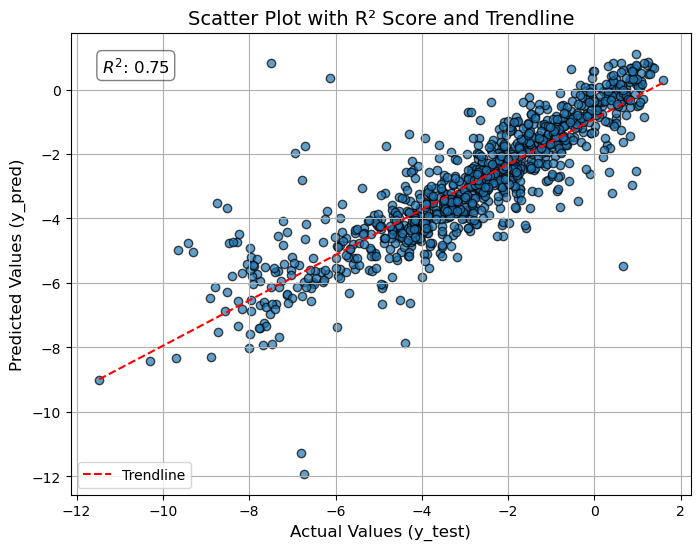

In [58]:
import matplotlib.pyplot as plt

# Scatter plot 생성
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7, edgecolors='k')

y_pred = y_pred.flatten()

# 추세선 계산 (1차 다항식, 즉 직선)
coefficients = np.polyfit(y_true, y_pred, 1)  # 1차원 선형 추세선
trendline = np.poly1d(coefficients)

# 추세선 추가
x_range = np.linspace(min(y_true), max(y_true), 100)
plt.plot(x_range, trendline(x_range), color='red', linestyle='--', label='Trendline')

# R² score 텍스트 표시
plt.text(0.05, 0.95, f'$R^2$: {test_r2:.2f}', fontsize=12, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# 그래프 꾸미기
plt.xlabel('Actual Values (y_test)', fontsize=12)
plt.ylabel('Predicted Values (y_pred)', fontsize=12)
plt.title('Scatter Plot with R² Score and Trendline', fontsize=14)
plt.legend()
plt.grid(True)

plt.savefig('./Plot/Solubility_scatter_plot_w_r2-버전2.png')

plt.show()

In [18]:
from sklearn.metrics import r2_score

# 1. Test 데이터셋에 대한 예측값 추론
y_pred = model.predict(test_dataset)

# 2. 실제 y값 (test_dataset.y) 과 비교하여 R2 스코어 계산
test_r2 = r2_score(test_dataset.y, y_pred)

print("Test R2 Score:", test_r2)


Test R2 Score: 0.7949052245292128


In [59]:
# 모델 훈련 후
model_1st.save_checkpoint(model_dir="./Aquasol/test_0.75/")  # 원하는 경로 지정

In [21]:
model